<a href="https://colab.research.google.com/github/praveenkumarchandaliya/STTP_Program/blob/XAI/STTP_SaliencyMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.youtube.com/watch?v=eudf1wQmXnc&t=302s
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import time
from IPython.display import display, clear_output
import cv2
import torch
import PIL
from pprint import pprint
import random
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from torchvision.models import resnet50, resnet18, ResNet50_Weights


In [ ]:
# Import resnet 50 model
model = resnet50(weights=ResNet50_Weights.DEFAULT)
# import weight and preprocess
preprocess  = ResNet50_Weights.DEFAULT.transforms()


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 137MB/s]


In [ ]:
#file_path = "/content/drive/MyDrive/STTP/cock.jpg"
file_path = "/content/drive/MyDrive/STTP/Cat.jpeg"
img  = PIL.Image.open(file_path)
#img
img_tensor = preprocess(img) # [B, C, W, H]
img_transformed = img_tensor.unsqueeze(0)#  Pytorch expecting the fourth dimension [Batch, Channel, W, H]
img_transformed.cuda()

tensor([[[[2.1119, 2.1633, 2.2147,  ..., 1.5468, 1.5297, 1.5125],
          [2.0948, 2.1462, 2.2147,  ..., 1.5468, 1.5297, 1.5125],
          [2.0948, 2.1633, 2.2147,  ..., 1.5468, 1.5297, 1.5125],
          ...,
          [1.9064, 1.9064, 1.9064,  ..., 1.5125, 1.4612, 1.4783],
          [1.9235, 1.9235, 1.9235,  ..., 1.5810, 1.5297, 1.5468],
          [1.9407, 1.9407, 1.9407,  ..., 1.5982, 1.5810, 1.5810]],

         [[2.0084, 2.0434, 2.1134,  ..., 1.0805, 1.0630, 1.0455],
          [1.9734, 2.0259, 2.0784,  ..., 1.0805, 1.0630, 1.0455],
          [1.9559, 2.0084, 2.0609,  ..., 1.0805, 1.0630, 1.0455],
          ...,
          [1.7983, 1.7983, 1.7983,  ..., 1.5007, 1.4482, 1.4657],
          [1.8158, 1.8158, 1.8158,  ..., 1.5707, 1.5182, 1.5357],
          [1.8333, 1.8333, 1.8333,  ..., 1.5882, 1.5707, 1.5707]],

         [[0.8971, 1.0539, 1.2282,  ..., 0.8448, 0.8622, 0.8448],
          [0.9494, 1.1062, 1.2805,  ..., 0.8448, 0.8622, 0.8448],
          [0.9494, 1.1237, 1.2980,  ..., 0

In [ ]:
#img_transformed.requires_grad()
img_transformed.requires_grad_(True) # Requires_grad tells Pytorch that ‘yes, I want to track the gradients on this tensor’.
pred = model(img_transformed)
pred.shape # ResNet have 1000 output
print(pred.shape)
class_idx = pred[0].argmax() # Give the higest index value
print(class_idx)
# Neuron which have higest classification score
class_neuron = pred[0,class_idx]
print(class_neuron)
#Using backpropagation, we can highlight pixels of the input image based on the amount of
# the gradient they receive, which shows their contribution to the final score.
class_neuron.backward() # Partial differential corresponding to input image (Back propagation)



torch.Size([1, 1000])
tensor(287)
tensor(0.8156, grad_fn=<SelectBackward0>)


# Image classification

In [ ]:
# Partial differential of heighest classifcation score
dImg = img_transformed.grad #
# remove the batch dimension
dImg = dImg.squeeze(0)
dImg.shape
dImg = dImg.detach().cpu().numpy() # GPU to CPU and convert into to numpy array
channel_1 = dImg[0]
channel_2 = dImg[1]
channel_3 = dImg[2]
channel_1.shape


(224, 224)

# Clear output

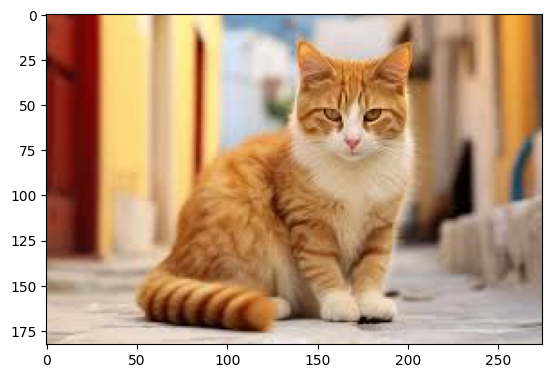

In [ ]:
img = PIL.Image.open(file_path)
plt.imshow(img)

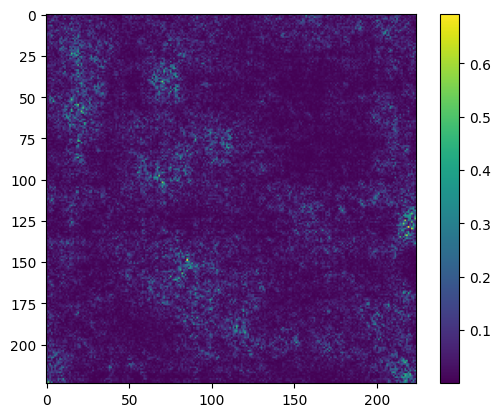

In [ ]:
from sklearn.preprocessing import normalize
# Plot the first saliency map
plt.imshow(normalize(np.abs(channel_1)))
plt.colorbar()

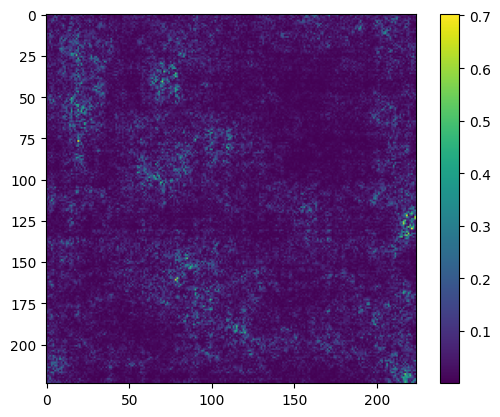

In [ ]:
plt.imshow(normalize(np.abs(channel_2)))
plt.colorbar()

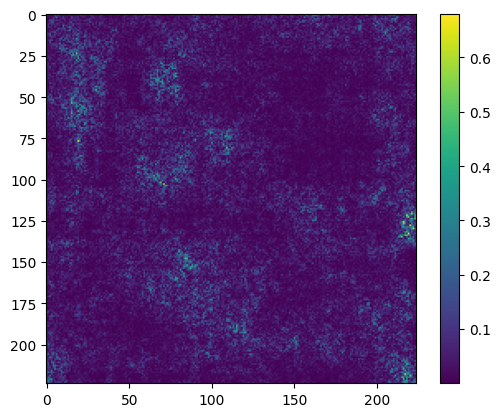

In [ ]:
plt.imshow(normalize(np.abs(channel_3)))
plt.colorbar()

# Download a pretrained model and its pre-processing